In [22]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt
import time

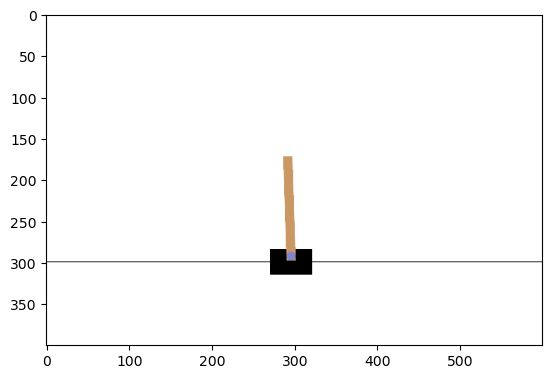

In [2]:
# render_mode="human"
environment = gym.make("CartPole-v1",render_mode="rgb_array")
environment.reset() 
tablero = environment.render()
plt.imshow(tablero)

Reward = 1.0 terminated = False truncated = False new_state = [-0.02510786  0.22890684 -0.03597907 -0.3506579 ]


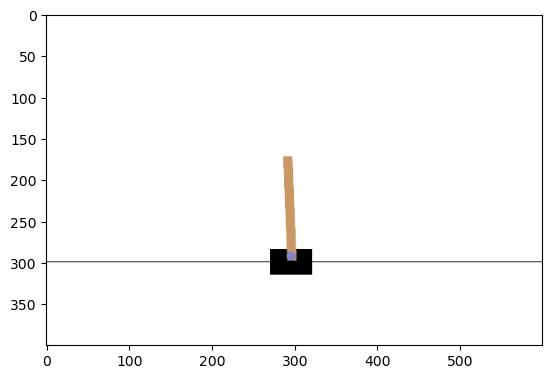

In [3]:
action = environment.action_space.sample()
new_state, reward, terminated, truncated, info = environment.step(action)
tablero = environment.render()
print(f'Reward = {reward} terminated = {terminated} truncated = {truncated} new_state = {new_state}')
plt.imshow(tablero)

In [ ]:
# simulate the environment
import time


episodeNumber=5
timeSteps=20
 
environment = gym.make("CartPole-v1",render_mode="human")
 
for episodeIndex in range(episodeNumber):
    initial_state=environment.reset()
    print(episodeIndex)
    environment.render()
    appendedObservations=[]
    for timeIndex in range(timeSteps):
        print(timeIndex)
        random_action=environment.action_space.sample()
        observation, reward, terminated, truncated, info =environment.step(random_action)
        appendedObservations.append(observation)
        time.sleep(0.1)
        if (terminated):
            time.sleep(1)
            break
environment.close() 

In [40]:
def get_dimension(x,y,size):
    subinterval_limits = np.linspace(x, y, size + 1)
    n=[]
    for ind,x in enumerate(subinterval_limits):
        if ind!=0:
            n.append(x)
        n.append(x)
    if len(n)%2!=0:
        n.pop(-1)
    val=np.split(n,np.arange(2,len(n),2))
    return subinterval_limits,val,len(val)

In [41]:

pos=get_dimension(-2.4,2.4,6)
vel=get_dimension(-4,4,10)
angl=get_dimension(-.2095,.2095,20)
ang_vel=get_dimension(-4,4,10)

In [42]:
env=gym.make('CartPole-v1')

In [44]:
# CON MEJORA CONTINUA

qtable = np.zeros((X, 2))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

#environment = gym.make("FrozenLake-v1", is_slippery=False,
#                       render_mode="human")
# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        #new_state, reward, done, info = environment.step(action)
        new_state, reward, terminated, truncated, info = environment.step(action)
        done = terminated or truncated
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

Q-table before training:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 577, in _pydevd_bundle.pydevd_cython.PyDBFrame._handle_exception
  File "_pydevd_bundle/pydevd_cython.pyx", line 312, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/diegogl/miniconda3/envs/ia/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2070, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/diegogl/miniconda3/envs/ia/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2106, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


IndexError: arrays used as indices must be of integer (or boolean) type